In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Data Path
data_path = "Resources/properties.csv"
# data_path_2 = "Resources/blank2.csv"

# Read the mouse data and the study results
data = pd.read_csv(data_path)
# data2 = pd.read_csv(data_path_2)

data_df = pd.DataFrame(data)
data_df.head()
# Merge
# data_pd = pd.merge(data, data2, how = "", on = "")


,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [25]:
# Clean up data
data_df = data_df.loc[:, ~data_df.columns.str.contains("^Unnamed")]
data_df

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [27]:
clean_data_df = data_df.drop_duplicates(subset=['Address'],keep="last")
clean_data_df

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [73]:
grouped = clean_data_df.groupby("AreaName")
area_data_df = grouped.agg({"Price ($)": ["mean","median","var","std","sem"]})
area_data_df.dropna()


Price ($)                                         \
                                 mean     median           var           std   
AreaName                                                                       
Acton                    3.793000e+05   349900.0  1.887327e+10  1.373800e+05   
Agincourt                4.193320e+05   331000.0  9.941951e+10  3.153086e+05   
Agincourt North          2.200000e+06  2200000.0  0.000000e+00  0.000000e+00   
Ainslie Wood             5.299000e+05   529900.0  0.000000e+00  0.000000e+00   
Ainslie Wood East        5.650837e+05   479000.0  6.825471e+10  2.612560e+05   
...                               ...        ...           ...           ...   
York                     8.271286e+05   860000.0  1.033138e+10  1.016434e+05   
York Mills               4.436242e+06  3989000.0  1.204471e+13  3.470549e+06   
York University Heights  4.716990e+05   345000.0  1.282213e+11  3.580800e+05   
Yorkdale                 1.208333e+05   115000.0  3.023083e+09  5.498257e+04   
Zephyr                   1.249616e+06  1199400.0  2.433300e+11  4.932849e+05   

                                        
                                   sem  
AreaName                                
Acton                     79316.391748  
Agincourt                 31220.202331  
Agincourt North               0.000000  
Ainslie Wood                  0.000000  
Ainslie Wood East         63363.891158  
...                                ...  
York                      38417.597123  
York Mills               708422.852893  
York University Heights   55922.697477  
Yorkdale                  31744.203320  
Zephyr                   201382.725804  

[912 rows x 5 columns]

In [70]:
Price_dicts = {
    "Mean Price" : area_mean,
    "AreaName" : area_data
}
Price_dfs = pd.DataFrame(Price_dicts)
Price_dfs

C:\Users\nguyenkc-INS\AppData\Local\Temp\ipykernel_26336\1325281672.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  Price_dfs = pd.DataFrame(Price_dicts)


StopIteration: 

StopIteration: 

In [49]:
Price_dict = {
    "Mean Price" : area_data_df,
}
Price_df = pd.DataFrame(Price_dict)
Price_df

,Mean Price
AreaName,
Aberfoyle,68000
Acton,379300
Agassiz,74000
Agincourt,425287
Agincourt North,2200000
...,...
York Mills,4436242
York University Heights,483229
Yorkdale,120833


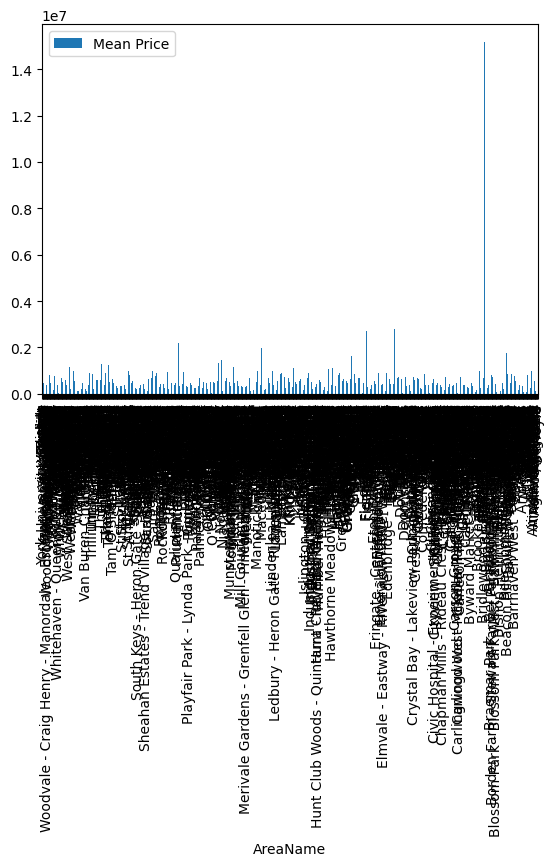

In [64]:
Price_df.sort_values(by="AreaName",ascending = False).plot.bar()
plt.show()

In [ ]:
bin = []

In [66]:
x = Price_df.iloc[0:100]
y = Price_df["Mean Price"]
plt.bar((x for x in range[0,100]), y)
plt.show()

print(Price_df.iloc[0:100])

TypeError: 'type' object is not subscriptable